<a href="https://colab.research.google.com/github/kaifoerster/ML_Lab_1_Group-A/blob/main/Lab_Session_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="markdown-google-sans">
  <h1>Introduction to feed-forward neural networks</h2>
</div>





# scikit-learn


`scikit-learn` is an open source machine learning library that supports supervised and unsupervised learning. It also provides various tools for model fitting, data preprocessing, model selection, model evaluation, and many other utilities.

### Loading the data



In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.metrics import mean_squared_error, mean_absolute_error

GLOBAL_RANDOM_STATE = 21


In [ ]:
data, target = fetch_california_housing(return_X_y=True, as_frame=True)

<Axes: xlabel='Latitude', ylabel='Longitude'>

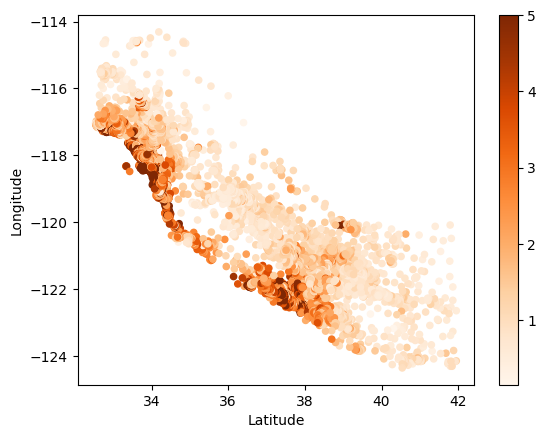

In [ ]:
data.plot.scatter(x='Latitude', y='Longitude', c=target, cmap='Oranges')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=.2, random_state=GLOBAL_RANDOM_STATE, shuffle=True)

In [ ]:
ScalerX = StandardScaler()
X_train_stand = ScalerX.fit_transform(X_train)
X_test_stand = ScalerX.transform(X_test)

### Constructing the model


In [ ]:
from sklearn.neural_network import MLPRegressor
#https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html

In [ ]:
sklearn_model = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5], max_iter=20, batch_size=200, validation_fraction=.1, early_stopping=True, verbose=True)
sklearn_model.fit(X_train, Y_train)

Iteration 1, loss = 196.33488686
Validation score: 0.142085
Iteration 2, loss = 0.94774145
Validation score: 0.132541
Iteration 3, loss = 0.98949105
Validation score: -6.238960
Iteration 4, loss = 1.25103571
Validation score: 0.229264
Iteration 5, loss = 1.34388793
Validation score: -0.557148
Iteration 6, loss = 3.90201423
Validation score: -7.087283
Iteration 7, loss = 8.77255669
Validation score: 0.341661
Iteration 8, loss = 0.61953659
Validation score: -0.006189
Iteration 9, loss = 0.39320776
Validation score: 0.287091
Iteration 10, loss = 0.74899527
Validation score: 0.253808
Iteration 11, loss = 0.59017337
Validation score: 0.424398
Iteration 12, loss = 29.00881240
Validation score: -11.460602
Iteration 13, loss = 2.06422180
Validation score: 0.258288
Iteration 14, loss = 0.43553475
Validation score: 0.400092
Iteration 15, loss = 0.41006173
Validation score: 0.163376
Iteration 16, loss = 0.40780340
Validation score: 0.467963
Iteration 17, loss = 0.36320352
Validation score: 0.4357

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(batch_size=200, early_stopping=True,
             hidden_layer_sizes=[1024, 128, 32], max_iter=20, verbose=True)

In [ ]:
#TO DO: implement the same model for the standardized data, experimenting with higher/lower batch sizes

In [ ]:
# @markdown
sklearn_model_stand = MLPRegressor(hidden_layer_sizes=[2**10, 2**7, 2**5], max_iter=50, early_stopping=True, verbose=True)
sklearn_model_stand.fit(X_train_stand, Y_train)

Iteration 1, loss = 0.57520527
Validation score: 0.582319
Iteration 2, loss = 0.20854430
Validation score: 0.688029
Iteration 3, loss = 0.18703695
Validation score: 0.696958
Iteration 4, loss = 0.17614183
Validation score: 0.721626
Iteration 5, loss = 0.17030748
Validation score: 0.732769
Iteration 6, loss = 0.16411572
Validation score: 0.743735
Iteration 7, loss = 0.15775537
Validation score: 0.748336
Iteration 8, loss = 0.15418970
Validation score: 0.758976
Iteration 9, loss = 0.15110550
Validation score: 0.764234
Iteration 10, loss = 0.14959470
Validation score: 0.736481
Iteration 11, loss = 0.14917780
Validation score: 0.769458
Iteration 12, loss = 0.14615612
Validation score: 0.765982
Iteration 13, loss = 0.14305564
Validation score: 0.775179
Iteration 14, loss = 0.14241409
Validation score: 0.780073
Iteration 15, loss = 0.14426438
Validation score: 0.774331
Iteration 16, loss = 0.13982301
Validation score: 0.776802
Iteration 17, loss = 0.13721481
Validation score: 0.781326
Iterat

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=[1024, 128, 32],
             max_iter=50, verbose=True)

### Evaluating the models

We can use different metrics to evaluate the performance of the model:
- Mean Absolute Error
- Mean Squared Error
- $R^2$ or coefficient of determination


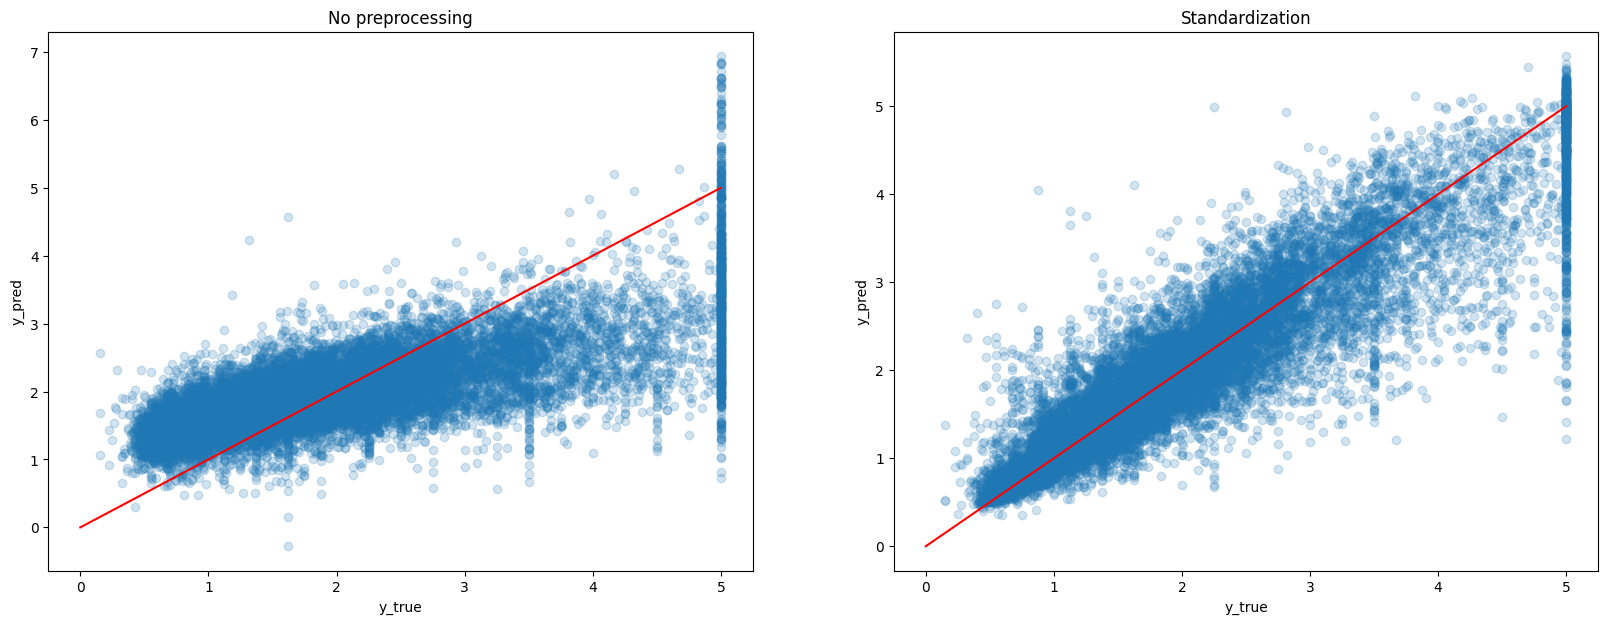

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(20,7))
model_input_title = [(sklearn_model, X_train, 'No preprocessing'), (sklearn_model_stand, X_train_stand, 'Standardization')]

for i in range(2):
  model, input, title = model_input_title[i]
  _ = axes[i].scatter(Y_train, model.predict(input), alpha=.2)
  _ = axes[i].plot(range(6),'r')
  _ = axes[i].set_xlabel('y_true')
  _ = axes[i].set_ylabel('y_pred')
  _ = axes[i].set_title(title)


In [ ]:
#TODO: print MSE and MAE. What might be the downsides of using such metrics to evaluate the performance of the algorithm?

In [ ]:
#@markdown

Y_pred, Y_pred_stand = sklearn_model.predict(X_test), sklearn_model_stand.predict(X_test_stand)
mae, mae_stand = mean_absolute_error(Y_pred, Y_test), mean_absolute_error(Y_pred_stand, Y_test)
mse, mse_stand = mean_squared_error(Y_pred, Y_test), mean_squared_error(Y_pred_stand, Y_test)

print(f"Mean absolute error of predictions: {mae} (without standardization), {mae_stand} (with standardization)")
print(f"Mean squared error of predictions: {mse} (without standardization), {mse_stand} (with standardization)")

# Tensorflow & Keras

`scikit-learn` is extremely user-friendly and recommended when getting warmed-up with ML. However, the implemented models are not flexible enough to suit tailored model implementation. In particular:
<ul>
<li>there is no possibility of customizing layers</li>
<li>default scoring function $R_2$ is hard to overwrite</li>
</ul>


We resort to `tensorflow`, an end-to-end library for Machine Learning that
offers a wide range of model customization and is mantained by Google.







In [ ]:
import tensorflow as tf
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.nn import relu, tanh
#https://www.tensorflow.org/api_docs/python/tf/keras/Sequential


tf.random.set_seed(GLOBAL_RANDOM_STATE)


In [ ]:
#we can define each layer with different activation functions and initial weight matrices

model_tf = Sequential([Dense(2**10, input_shape=(X_train.shape[1],), activation=relu),
                       Dense(2**7, activation=relu),
                       Dense(2**5, activation=relu),
                       Dense(1)]) #output layer, linear activation function



In [ ]:
#we convert input to np.arrays as Tensorflow does not accept pd.DataFrames
X_train_np, Y_train_np, X_test_np, Y_test_np =  X_train.values, Y_train.values, X_test.values, Y_test.values

loss = 'mean_squared_error'
model_tf.compile(loss=loss)
model_tf.fit(X_train_np, Y_train_np, batch_size=200, epochs=50)

In [ ]:
#TODO: change activation function of the last hidden layer to tanh and reevaluate the model

In [ ]:
# @title
model_tf.layers[2].activation = tanh

for i, layer in enumerate(model_tf.layers):
    try:
        print(f"Activation function for layer {i}: {layer.activation}")
    except AttributeError:
        print(f"Layer {i} uses no activation function")

In [ ]:
# @title
model_tf.fit(X_train_np, Y_train_np, batch_size=200, epochs=50)

# PyTorch

Another established alternative is `PyTorch`, a library for Machine Learning that is becoming more and more <a href=" https://paperswithcode.com/trends">popular</a> for Deep Learning and is backed by Facebook. For advanced user, `PyTorch` offers following advantages:

<ul><li>Easier debugging</li>
<li>Better processing speed</li>
</ul>

In [ ]:
!pip install torch torchvision

In [ ]:
from torch import Tensor
from torch.nn import Module, Linear
from torch.nn.functional import relu, tanh
#https://pytorch.org/docs/stable/generated/torch.nn.Module.html


In [ ]:
X_train_torch = Tensor(X_train.values) #torch only accepts torch.Tensors as input

In [ ]:
class Model(Module):

    def __init__(self):
        super().__init__()

        self.layer1 = Linear(X_train.shape[0], 2**10)
        self.layer2 = Linear(2**10, 2**5)


    def forward(self, x):

        x = self.layer1(x)
        x = relu(x)
        x = self.layer2(x)
        x = relu(x)

        return x